Credit to /u/tacoslim for the strategy

In [257]:
# Note: the data must be in the same directory as this notebook to function correctly
# Start by wrangling the data
import pandas as pd
btcdf = pd.read_csv('BTC-CoinDesk.csv', 
                    index_col = 'Date',
                    parse_dates=True, 
                   )
btcdf.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [258]:
btcdf = btcdf['24h Open (USD)']
btcdf

Date
2013-10-01      124.304660
2013-10-02      123.654990
2013-10-03      125.455000
2013-10-04      108.584830
2013-10-05      118.674660
                  ...     
2021-03-24    54143.106041
2021-03-25    54375.807629
2021-03-26    52335.565034
2021-03-27    51344.048980
2021-03-28    55067.824399
Name: 24h Open (USD), Length: 2736, dtype: float64

In [259]:
ethdf = pd.read_csv('ETH-CoinDesk.csv',
                     index_col = 'Date',
                     parse_dates=True, 
                   )
ethdf.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2015-08-09,ETH,0.909046,1.749289,1.916540,0.794497
2015-08-10,ETH,0.692321,0.909046,0.909046,0.692321
2015-08-11,ETH,0.668067,0.692321,0.692321,0.654331
2015-08-12,ETH,0.850151,0.668067,1.148621,0.668067
2015-08-13,ETH,1.266023,0.850151,1.266023,0.850151


In [260]:
ethdf = ethdf['24h Open (USD)']
ethdf

Date
2015-08-09       1.749289
2015-08-10       0.909046
2015-08-11       0.692321
2015-08-12       0.668067
2015-08-13       0.850151
                 ...     
2021-03-24    1682.982718
2021-03-25    1669.164560
2021-03-26    1583.394738
2021-03-27    1587.234415
2021-03-28    1700.081390
Name: 24h Open (USD), Length: 2059, dtype: float64

In [261]:
btcStartDate = btcdf.index[0]
print(btcStartDate)
ethStartDate = ethdf.index[0]
#startDate = max(btcStartDate, ethStartDate)
startDate = '2018-06-06 00:00:00'
print(startDate)

2013-10-01 00:00:00
2018-06-06 00:00:00


In [262]:
btcdf = btcdf.where(btcdf.index >= startDate)
btcdf = btcdf.dropna()
btcdf = btcdf.to_frame()
btcdf['Scaled'] = btcdf.divide(btcdf.iloc[0])
btcdf

,24h Open (USD),Scaled
Date,,
2018-06-06,7505.589281,1.000000
2018-06-07,7617.980000,1.014974
2018-06-08,7658.570000,1.020382
2018-06-09,7684.930000,1.023894
2018-06-10,7618.110000,1.014992
...,...,...
2021-03-24,54143.106041,7.213705
2021-03-25,54375.807629,7.244709
2021-03-26,52335.565034,6.972879


In [263]:
ethdf = ethdf.where(ethdf.index >= startDate)
ethdf = ethdf.dropna()
ethdf = ethdf.to_frame()
ethdf['Scaled'] = ethdf.divide(ethdf.iloc[0])
ethdf

,24h Open (USD),Scaled
Date,,
2018-06-06,591.549075,1.000000
2018-06-07,607.600000,1.027134
2018-06-08,606.180000,1.024733
2018-06-09,603.560000,1.020304
2018-06-10,598.590000,1.011903
...,...,...
2021-03-24,1682.982718,2.845043
2021-03-25,1669.164560,2.821684
2021-03-26,1583.394738,2.676692


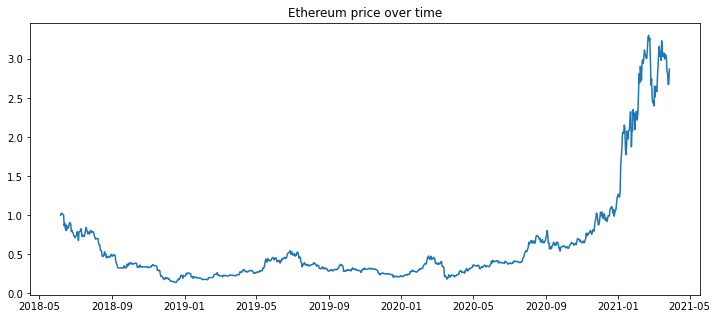

In [264]:
# Visualise the data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title('Ethereum price over time')
plt.plot(ethdf['Scaled'])

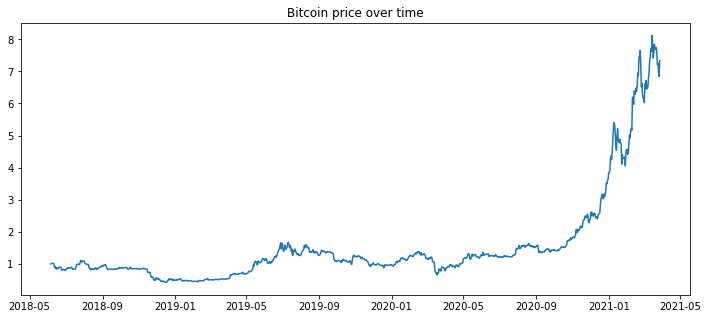

In [265]:
plt.figure(figsize=(12,5))
plt.title('Bitcoin price over time')
plt.plot(btcdf['Scaled'])

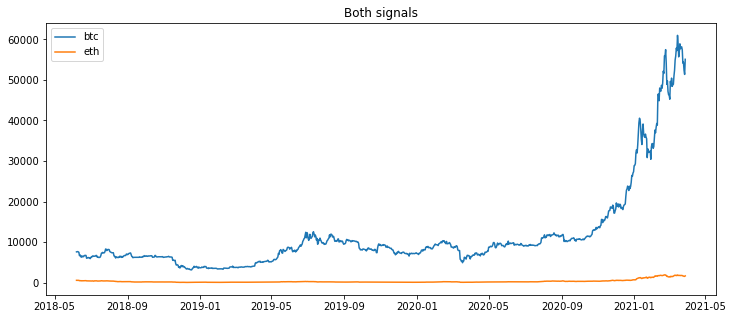

In [273]:
plt.figure(figsize=(12,5))
plt.title('Both signals')
plt.plot(btcdf['24h Open (USD)'], label="btc")
plt.plot(ethdf['24h Open (USD)'], label="eth")
plt.legend(loc="upper left")
plt.show()

These price series look similar. To quantify this we perform cointegration tests on the returns of each cryptocurrency.

In [267]:
btcdf['Returns'] = btcdf['24h Open (USD)'].pct_change()
btcdf = btcdf.dropna()
btcdf

,24h Open (USD),Scaled,Returns
Date,,,
2018-06-07,7617.980000,1.014974,0.014974
2018-06-08,7658.570000,1.020382,0.005328
2018-06-09,7684.930000,1.023894,0.003442
2018-06-10,7618.110000,1.014992,-0.008695
2018-06-11,7495.100000,0.998602,-0.016147
...,...,...,...
2021-03-24,54143.106041,7.213705,-0.056563
2021-03-25,54375.807629,7.244709,0.004298
2021-03-26,52335.565034,6.972879,-0.037521


In [268]:
ethdf['Returns'] = ethdf['24h Open (USD)'].pct_change()
ethdf = ethdf.dropna()
ethdf

,24h Open (USD),Scaled,Returns
Date,,,
2018-06-07,607.600000,1.027134,0.027134
2018-06-08,606.180000,1.024733,-0.002337
2018-06-09,603.560000,1.020304,-0.004322
2018-06-10,598.590000,1.011903,-0.008234
2018-06-11,593.410000,1.003146,-0.008654
...,...,...,...
2021-03-24,1682.982718,2.845043,-0.056687
2021-03-25,1669.164560,2.821684,-0.008211
2021-03-26,1583.394738,2.676692,-0.051385


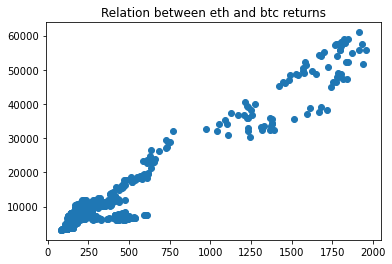

In [269]:
plt.scatter(ethdf['24h Open (USD)'], btcdf['24h Open (USD)'])
plt.title('Relation between eth and btc returns')
plt.show()

In [270]:
# Test for cointegration between the two series. The null hypothesis is that there is no cointegration between 
# ethereum and bitcoin.
# If the P value is below 5%, we can reject the null hypothesis
import statsmodels.tsa.stattools as ts
cointegration, p_value, crit = ts.coint(btcdf['24h Open (USD)'], ethdf['24h Open (USD)'], autolag="AIC")
print("P value is: " + str(p_value))

P value is: 0.004672238323477051


From the p value calculated, we can reject the hypothesis that there is no cointegration.

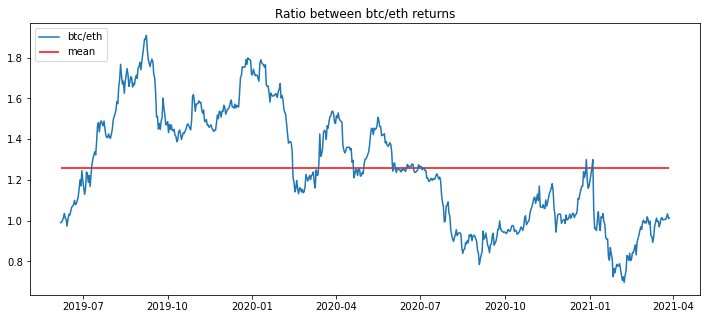

In [235]:
import statistics as stat
# Calculate the ratio between returns
plt.figure(figsize=(12,5))
plt.title('Ratio between btc/eth returns')
plt.hlines(stat.mean(btcdf['Scaled']/ethdf['Scaled']), 
           ethdf.index[0], 
           ethdf.index[-1], 
           color="red", 
           label="mean")
plt.plot(btcdf['Scaled']/ethdf['Scaled'], 
         label="btc/eth")

plt.legend(loc="upper left")
plt.show()

In [236]:
# This isn't useful without normalizing the data. 
# We compute the z-score using a window of the previous 30 days to avoid look-ahead bias
from scipy import stats

z_scores = [stats.zscore( (btcdf['Scaled']/ethdf['Scaled'])[i-30:i])[0] for i in range(30, btcdf.shape[0])]
len(z_scores)

631

In [237]:
z_scores[200]

0.5096509745313701

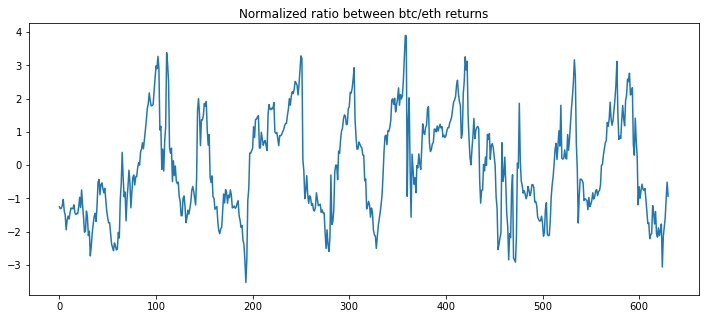

In [238]:
# Visualise the normalized ratio between returns
plt.figure(figsize=(12,5))
plt.title('Normalized ratio between btc/eth returns')
plt.plot(z_scores)
plt.show()

Now to generate to buy/ sell signals. When the ratio goes above +2 btc is overvalued relative to eth, so we short btc and long eth; the opposite is done at -2, as we expect the ratio to revert.

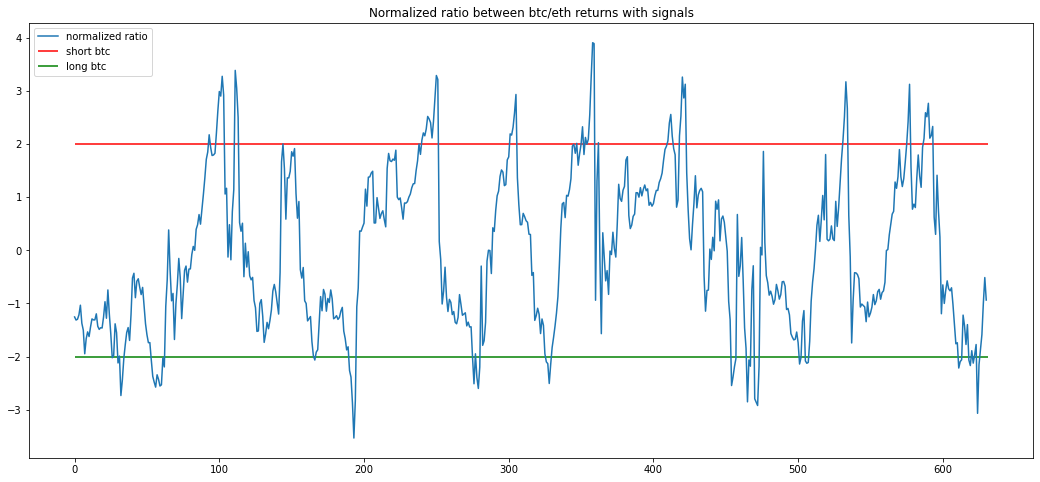

In [239]:
# Visualise the buy/sell signals
plt.figure(figsize=(18,8))
plt.title('Normalized ratio between btc/eth returns with signals')
plt.hlines(2, 
           0, 
           len(z_scores), 
           color="red", 
           label="short btc")

plt.hlines(-2, 
           0, 
           len(z_scores), 
           color="green", 
           label="long btc")
plt.plot(z_scores, label= "normalized ratio")

plt.legend(loc="upper left")
plt.show()

In [240]:
status = 0 # initalize at 0, set to -1 when going long and +1 when going short on btc

signals = []
for i in range(0, len(z_scores)):
    if np.less(z_scores[i], -2):
        status = -2
    elif np.greater(z_scores[i], 2):
        status = 2
    signals.append(status)

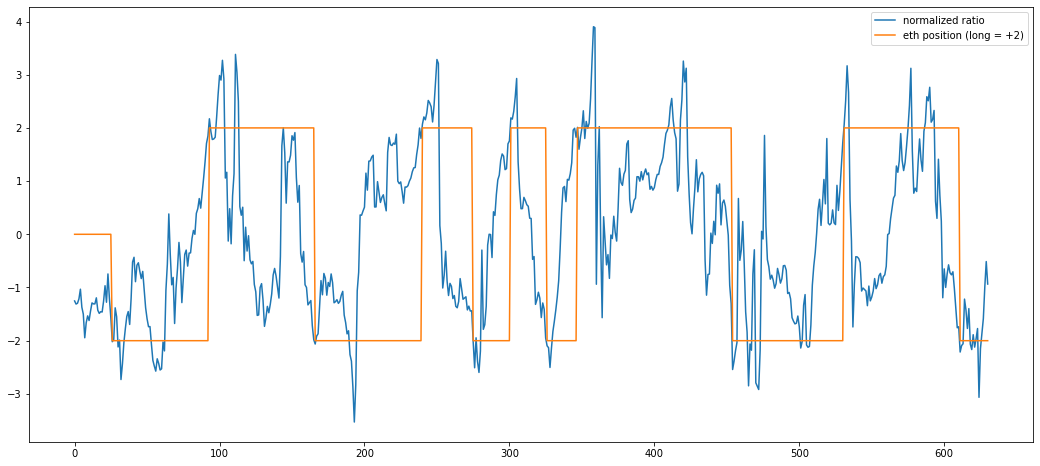

In [241]:
plt.figure(figsize=(18,8))
plt.plot(z_scores, label= "normalized ratio")
plt.plot(signals, label= "eth position (long = +2)")
plt.legend(loc="upper right")

In [242]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(z_scores, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -5.156221880870624
n_lags: 1.079383246866301e-05
p-value: 1.079383246866301e-05
Critial Values:
   1%, -3.4407724517110783
Critial Values:
   5%, -2.866138605582151
Critial Values:
   10%, -2.569218982111363


# Discussion:
blah